In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Loading Data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
store_df = pd.read_csv("store.csv")

/Users/pratheerthpadman/anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Stats

In [6]:
train_df.info()
print("-" * 30)
test_df.info()
print("-" * 30)
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5)

##### Training set contains no null values. There are some null values in the test set "Open" feature. Multiple features with null values in the store data

In [7]:
print ("The training dataset has {} samples and {} features".format(*train_df.shape))
print ("The testing dataset has {} samples and {} features".format(*test_df.shape))
print ("The store dataset has {} sample and {} features".format(*store_df.shape))

The training dataset has 1017209 samples and 9 features
The testing dataset has 41088 samples and 8 features
The store dataset has 1115 sample and 10 features


### Cleaning dataset

In [8]:
# Column - Date
print("Fixing the Timestamps")
train_df["Date"] = pd.to_datetime(train_df["Date"], format="%Y-%m-%d")
test_df["Date"] = pd.to_datetime(train_df["Date"], format="%Y-%m-%d")

Fixing the Timestamps


In [9]:
# Column - Open
# fill NaN values in test_df with Open=1 if DayOfWeek != 7
test_df["Open"][test_df["Open"] != test_df["Open"]] = (test_df["DayOfWeek"] != 7).astype(int)

/Users/pratheerthpadman/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
# Column - State Holiday
train_df["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [11]:
test_df["StateHoliday"].value_counts()

0    40908
a      180
Name: StateHoliday, dtype: int64

In [12]:
#In the training dataset, StateHoliday has values 0 and "0". We'll need to merge those
train_df["StateHoliday"].loc[train_df["StateHoliday"]==0] = "0"

/Users/pratheerthpadman/anaconda/envs/carnd-term1/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
# StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 
#Note that all schools are closed on public holidays and weekends.
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None

In [14]:
#Now the a, b, c categories need to mapped to Holidays
train_df["StateHoliday"] = train_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test_df["StateHoliday"] = test_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [15]:
#Store Dataset
#Column - Competition Distance
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].mean(), inplace=True)

In [16]:
#Column - DayofWeek
train_df = pd.concat([train_df, pd.get_dummies(train_df["DayOfWeek"], prefix="DOW_")], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df["DayOfWeek"], prefix="DOW_")], axis=1)

In [17]:
#Column - StoreType
store_df = pd.concat([store_df, pd.get_dummies(store_df["StoreType"], prefix="StoreType_")], axis=1)

In [18]:
#Column - Assortment
#Assortment - describes an assortment level: a = basic, b = extra, c = extended
store_df["Assortment"] = store_df["Assortment"].map({"a": 1, "b": 2, "c": 3})

In [19]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 14 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null int64
CompetitionDistance          1115 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
StoreType__a                 1115 non-null uint8
StoreType__b                 1115 non-null uint8
StoreType__c                 1115 non-null uint8
StoreType__d                 1115 non-null uint8
dtypes: float64(5), int64(3), object(2), uint8(4)
memory usage: 91.5+ KB


(array([  2.96673000e+05,   5.05472000e+05,   1.69792000e+05,
          3.32340000e+04,   8.90100000e+03,   2.36200000e+03,
          5.65000000e+02,   1.74000000e+02,   2.80000000e+01,
          8.00000000e+00]),
 array([     0. ,   4155.1,   8310.2,  12465.3,  16620.4,  20775.5,
         24930.6,  29085.7,  33240.8,  37395.9,  41551. ]),
 <a list of 10 Patch objects>)

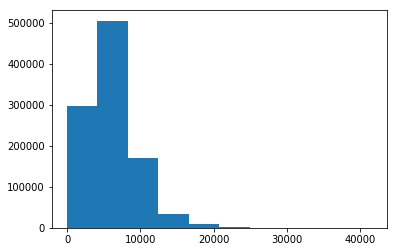

In [20]:
plt.hist(train_df["Sales"])

### Feature Extraction

In [21]:
sale_mean_per_store = train_df.groupby("Store").Sales.mean()
sale_mean_per_store.name = "Mean Sales"

In [22]:
cust_mean_per_store = train_df.groupby("Store").Customers.mean()
cust_mean_per_store.name = "Mean Customers"

In [23]:
train_df = train_df.join(sale_mean_per_store, on="Store")
test_df = test_df.join(sale_mean_per_store, on="Store")

train_df = train_df.join(cust_mean_per_store, on="Store")
test_df = test_df.join(cust_mean_per_store, on="Store")

In [24]:
train_df.drop("Customers", axis=1, inplace=True)

In [25]:
train_df["Month"] = train_df["Date"].dt.month
train_df["Year"] = train_df["Date"].dt.year
train_df["DayofYear"] = train_df["Date"].dt.dayofyear
train_df["WeekofYear"] = train_df["Date"].dt.weekofyear

In [26]:
test_df["Month"] = test_df["Date"].dt.month
test_df["Year"] = test_df["Date"].dt.year
test_df["DayofYear"] = test_df["Date"].dt.dayofyear
test_df["WeekofYear"] = test_df["Date"].dt.weekofyear

In [27]:
train_df.drop("Date", axis=1, inplace=True)
test_df.drop("Date", axis=1, inplace=True)
print("Dropped Date column")

Dropped Date column


In [28]:
cols_to_drop = ["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", 
                "PromoInterval", "StoreType"]

In [29]:
store_df.drop(cols_to_drop, axis=1, inplace=True)
print("Dropped Columns")

Dropped Columns


### Preparing datasets

In [30]:
#Saving Id's for submission file
ID = test_df["Id"]
test_df.drop("Id", axis=1, inplace=True)

In [31]:
#print("Consider only open stores for training. Closed stores wont count into the score.")
#train_df = train_df[train_df["Open"] != 0]
print("Use only Sales bigger then zero. Simplifies calculation of rmspe")
train = train_df[train_df["Sales"] > 0]

Use only Sales bigger then zero. Simplifies calculation of rmspe


In [32]:
train_df.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,DOW__1,DOW__2,DOW__3,DOW__4,DOW__5,DOW__6,DOW__7,Mean Sales,Mean Customers,Month,Year,DayofYear,WeekofYear
0,1,5,5263,1,1,0,1,0,0,0,0,1,0,0,3945.704883,467.646497,7,2015,212,31
1,2,5,6064,1,1,0,1,0,0,0,0,1,0,0,4122.991507,486.045648,7,2015,212,31
2,3,5,8314,1,1,0,1,0,0,0,0,1,0,0,5741.253715,620.286624,7,2015,212,31
3,4,5,13995,1,1,0,1,0,0,0,0,1,0,0,8021.769639,1100.057325,7,2015,212,31
4,5,5,4822,1,1,0,1,0,0,0,0,1,0,0,3867.110403,444.360934,7,2015,212,31


In [33]:
#train_df = pd.merge(train_df, store_df, on="Store")
#test_df = pd.merge(test_df, store_df, on="Store")

In [34]:
test_df["Open"] = test_df["Open"].astype(int)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
Store             1017209 non-null int64
DayOfWeek         1017209 non-null int64
Sales             1017209 non-null int64
Open              1017209 non-null int64
Promo             1017209 non-null int64
StateHoliday      1017209 non-null int64
SchoolHoliday     1017209 non-null int64
DOW__1            1017209 non-null uint8
DOW__2            1017209 non-null uint8
DOW__3            1017209 non-null uint8
DOW__4            1017209 non-null uint8
DOW__5            1017209 non-null uint8
DOW__6            1017209 non-null uint8
DOW__7            1017209 non-null uint8
Mean Sales        1017209 non-null float64
Mean Customers    1017209 non-null float64
Month             1017209 non-null int64
Year              1017209 non-null int64
DayofYear         1017209 non-null int64
WeekofYear        1017209 non-null int64
dtypes: float64(2), int64(11), uint8(7)
memory usage: 107.7 MB


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 19 columns):
Store             41088 non-null int64
DayOfWeek         41088 non-null int64
Open              41088 non-null int64
Promo             41088 non-null int64
StateHoliday      41088 non-null int64
SchoolHoliday     41088 non-null int64
DOW__1            41088 non-null uint8
DOW__2            41088 non-null uint8
DOW__3            41088 non-null uint8
DOW__4            41088 non-null uint8
DOW__5            41088 non-null uint8
DOW__6            41088 non-null uint8
DOW__7            41088 non-null uint8
Mean Sales        41088 non-null float64
Mean Customers    41088 non-null float64
Month             41088 non-null int64
Year              41088 non-null int64
DayofYear         41088 non-null int64
WeekofYear        41088 non-null int64
dtypes: float64(2), int64(10), uint8(7)
memory usage: 4.0 MB


In [37]:
y_train = np.array(train_df["Sales"])
X_train = np.array(train_df.drop("Sales", axis=1))

In [38]:
test_df = np.array(test_df)

### Model

In [37]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, max_depth=7, random_state=5)

In [40]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7,
                         nthread=-1, seed=7, colsample_bytree = 0.7,
                         subsample =  0.7, learning_rate=0.1)

/Users/pratheerthpadman/anaconda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=1000, depth=7, learning_rate=0.1)

In [39]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

##define base model
def base_model():
     model = Sequential()
     model.add(Dense(400, input_dim=X_train.shape[1], init='normal', activation='relu'))
     model.add(Dropout(.1))
     model.add(Dense(128, init="normal", activation="relu"))
     model.add(Dropout(.1))
     model.add(Dense(64, init="normal", activation="relu"))
     model.add(Dense(32, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adamax')
     return model

seed = 7
np.random.seed(seed)

model = KerasRegressor(build_fn=base_model, epochs=70, batch_size=128,verbose=1)

Using TensorFlow backend.


In [40]:
model.fit(X_train, y_train)

/Users/pratheerthpadman/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=19, activation="relu", kernel_initializer="normal")`
/Users/pratheerthpadman/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal")`
/Users/pratheerthpadman/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="normal")`
/Users/pratheerthpadman/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="normal")`
/Users/pratheerthpadman/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__

Epoch 1/70
1017209/1017209 [==============================] - 45s 44us/step - loss: 4929853.4323
Epoch 2/70
1017209/1017209 [==============================] - 42s 41us/step - loss: 2158164.8743
Epoch 3/70
1017209/1017209 [==============================] - 42s 41us/step - loss: 2045156.1066
Epoch 4/70
1017209/1017209 [==============================] - 42s 41us/step - loss: 1992210.8542
Epoch 5/70
1017209/1017209 [==============================] - 42s 41us/step - loss: 1942528.1714
Epoch 6/70
1017209/1017209 [==============================] - 43s 42us/step - loss: 1949393.9372
Epoch 7/70
1017209/1017209 [==============================] - 44s 43us/step - loss: 1903015.7733
Epoch 8/70
1017209/1017209 [==============================] - 44s 43us/step - loss: 1917311.8253
Epoch 9/70
1017209/1017209 [==============================] - 43s 42us/step - loss: 1932206.5775
Epoch 10/70
1017209/1017209 [==============================] - 44s 43us/step - loss: 1864849.4622
Epoch 11/70
1017209/1017209 [

In [41]:
y_pred = model.predict(test_df)

41088/41088 [==============================] - 1s 15us/step


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
Store             1017209 non-null int64
DayOfWeek         1017209 non-null int64
Open              1017209 non-null int64
Promo             1017209 non-null int64
StateHoliday      1017209 non-null int64
SchoolHoliday     1017209 non-null int64
Mean Sales        1017209 non-null float64
Mean Customers    1017209 non-null float64
Month             1017209 non-null int64
Year              1017209 non-null int64
DayofYear         1017209 non-null int64
WeekofYear        1017209 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.1 MB


In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 12 columns):
Store             41088 non-null int64
DayOfWeek         41088 non-null int64
Open              41088 non-null int64
Promo             41088 non-null int64
StateHoliday      41088 non-null int64
SchoolHoliday     41088 non-null int64
Mean Sales        41088 non-null float64
Mean Customers    41088 non-null float64
Month             41088 non-null int64
Year              41088 non-null int64
DayofYear         41088 non-null int64
WeekofYear        41088 non-null int64
dtypes: float64(2), int64(10)
memory usage: 3.8 MB


In [42]:
submission = pd.DataFrame()
submission['id'] = ID
submission['Sales'] = y_pred
submission.to_csv('Submission-keras3-sharper.csv', index=False)

Feature ranking:
1. feature 2 (0.518650)
2. feature 6 (0.359502)
3. feature 3 (0.087024)
4. feature 1 (0.020662)
5. feature 10 (0.013470)
6. feature 7 (0.000315)
7. feature 11 (0.000236)
8. feature 0 (0.000094)
9. feature 8 (0.000046)
10. feature 4 (0.000000)
11. feature 9 (0.000000)
12. feature 5 (0.000000)


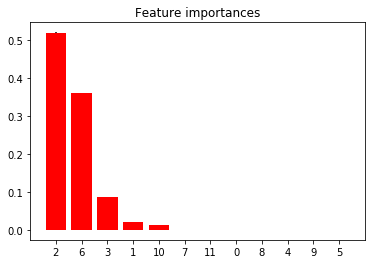

In [49]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()